Aufgabe 1

In [30]:
import numpy as np
mu, sigma = 0, 0.1
list10 = np.random.normal(mu,sigma,10)
list100 = np.random.normal(mu,sigma,100)
list1000 = np.random.normal(mu,sigma,1000)

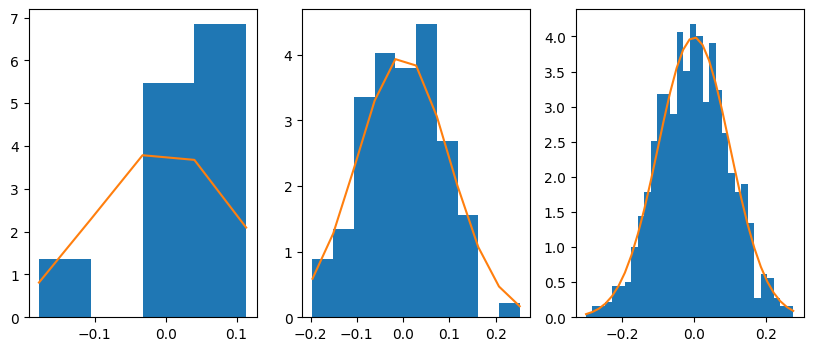

In [31]:
import math
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

count, bins, ignored = ax1.hist(list10, math.ceil(math.sqrt(10)), density=True)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

count, bins, ignored = ax2.hist(list100, math.ceil(math.sqrt(100)), density=True)
ax2.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

count, bins, ignored = ax3.hist(list1000, math.ceil(math.sqrt(1000)), density=True)
ax3.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

plt.show()

Aufgabe 2 + 3

In [32]:
counters = np.empty(100)
for iter in range(100):
    randList5 = list(np.random.randint(0,2,5))
    counter = 0
    while 0 in randList5:
        for i in range(len(randList5)):
            if np.random.uniform(0,1) <= 0.1:
                randList5[i] ^= 1
                counter += 1
    counters[iter] = counter
print(counters)


[ 55. 129.  97.  22.  14.  97.   9.  50.  12.  31.  89.  91.  52.  36.
  53.  22.  60.   2.   7.  19.  16.   0.   6.  72.  59.  11.   8.  25.
  54.  22.  19.  33.  86.  20.  24.  46.  50.  63.  11.   3.  67.  16.
  25.   1.   4.  32.  16.  21.  19. 129.  23.   0. 117.  52.  90.  21.
 130.   2.  28.   2.  23.  10.  51.   1.  59.  99.  72.  15.  82.  11.
  84.  14.   9.  16.  41.  42.  17.  14.  36.  17.  18.  46.   9.  40.
 151.  92. 111.  11.   6.  20.  93.  22.  58.  37.  32.  20.   2.  19.
  12.  25.]


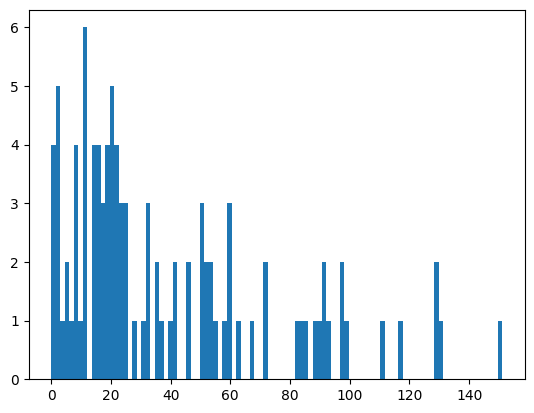

In [33]:
plt.hist(counters, bins=100)
plt.show()


Aufgabe 4

In [34]:
from pylab import meshgrid
import pylab
from matplotlib import colors
import time
from IPython import display
np.random.seed(10)

In [35]:
xMin, xMax, yMin, yMax, populationSize = -2,2,-1,3,20

In [36]:
#Rosenbrock Funktion

a, b = 1, 100
def func(x,y):
 return (a-x)**2+b*(y-x**2)**2


In [37]:
#Mutation function with 30% chance to mutate
#Mutation without consideration of restrictions medium normal distribution

xSigma = (xMax - xMin) / 100.0

def mutation(x):
   for i in range(len(x)):
       if np.random.uniform(0,1) <= 0.3:  #30% chance to mutate
         x[i] += np.random.normal(0,xSigma,1) 
   return x

In [38]:
#recombination function
#discrete recombination
def recombination(x,y):
   return x,np.append(y[populationSize//2:], y[:populationSize//2])

In [39]:
#checks if the euclidean distance among all points is small enough
def check(x,y):
   for i in range(len(x)-1):
      for j in range(i,len(x)):
         temp = np.array((x[i]-x[j],y[i],y[j]))
         dist = np.sqrt(np.dot(temp.T, temp))
         if dist > 0.4:
            return False
   return True

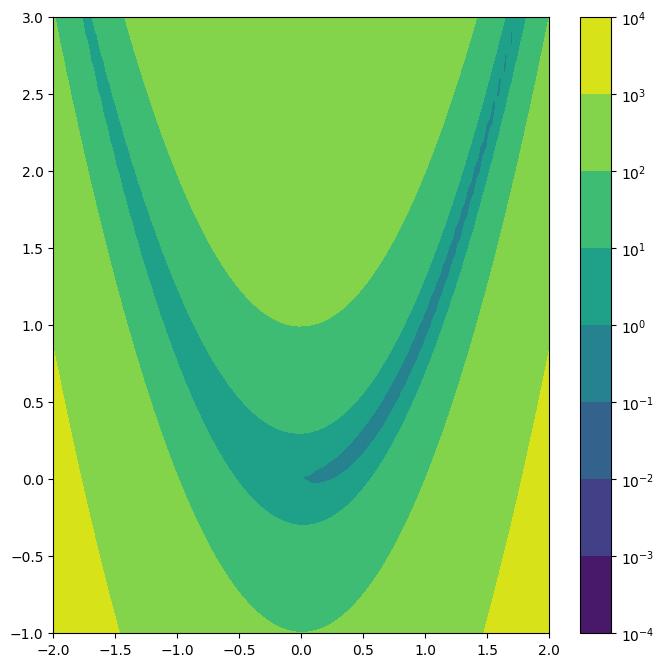

In [40]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
x = np.linspace(xMin,xMax,80)
y = np.linspace(yMin,yMax,80)
X,Y = meshgrid(x, y)
Z = func(X, Y) 

cset = ax.contourf(X, Y, Z, norm=colors.LogNorm())
plt.colorbar(cset)

popX = np.random.uniform(low=xMin, high=xMax, size=100)
popY = np.random.uniform(low=yMin, high=yMax, size=100)
funcVals = np.array(func(popX, popY))

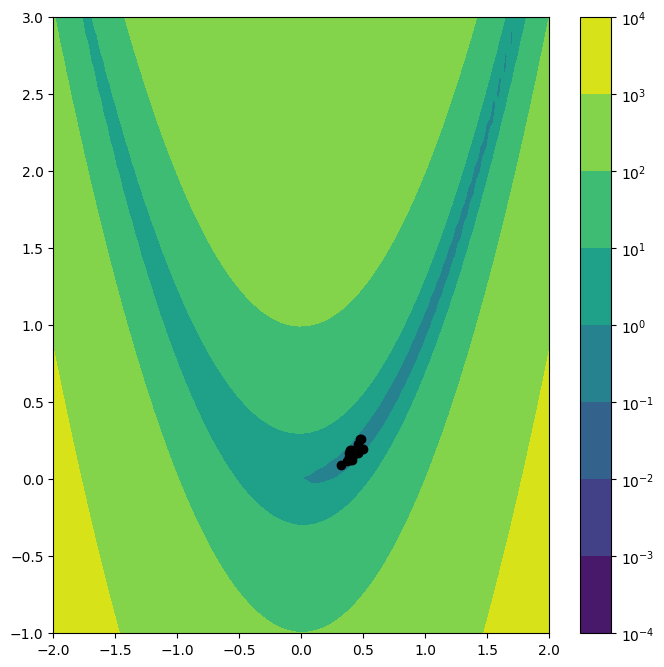

In [41]:
counter = 0
while True:

   #get the best n of the population (elite)
   idx = np.argpartition(funcVals, populationSize)
   filter_indices = idx[:populationSize]
   bestPopX = popX[filter_indices] 
   bestPopY = popY[filter_indices]

   #plot and sleep
   ax.clear()
   ax.contourf(X, Y, Z, norm=colors.LogNorm())
   ax.plot( bestPopX, bestPopY, 'o', color='black')
   
   display.clear_output(wait=True)
   display.display(fig)
   time.sleep(1)

   #Check abort condition
   if(check(bestPopX,bestPopY)):
      break
   
   #recombine
   popX = np.append(bestPopX,(np.array(recombination(bestPopX,bestPopY)[0])))
   popY = np.append(bestPopY,(np.array(recombination(bestPopX,bestPopY)[1])))
   
   #mutate
   popX = mutation(popX)
   popY = mutation(popY)

   #calculate new values
   funcVals = np.array(func(popX, popY))
   counter += 1

display.clear_output(wait=True)  

In [42]:
#Stats
print('Years: ',end="")
print(counter)
print('Best Value: ',end="")
print(funcVals[0])

Years: 9
Best Value: 0.30318891528864256
